# Generating datasets and examples


forge dataset

In [6]:
import sys
print("Python version: {}".format(sys.version))
import pandas as pd
print("pandas version: {}".format(pd.__version__))
import matplotlib
print("matplotlib version: {}".format(matplotlib.__version__))
import numpy as np
print("NumPy version: {}".format(np.__version__))
import scipy as sp
print("SciPy version: {}".format(sp.__version__))
import IPython
print("IPython version: {}".format(IPython.__version__))
import sklearn
print("scikit-learn version: {}".format(sklearn.__version__))
import mglearn
import matplotlib.pyplot as plt
%matplotlib inline

Python version: 3.7.3 (default, Mar 27 2019, 17:13:21) [MSC v.1915 64 bit (AMD64)]
pandas version: 0.24.2
matplotlib version: 3.0.3
NumPy version: 1.16.2
SciPy version: 1.2.1
IPython version: 7.4.0
scikit-learn version: 0.20.3


D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


X.shape: (26, 2)


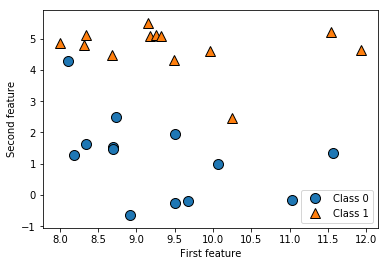

In [7]:
X,y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))


Synthetic dataset


Text(0, 0.5, 'Target')

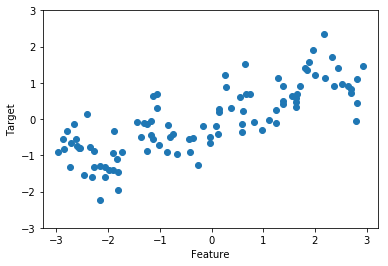

In [8]:
X,y=mglearn.datasets.make_wave()
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel("Feature")
plt.ylabel("Target")


# CANCER data set

In [9]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
print("cancer keys:\n{}".format(cancer.keys()))

cancer keys:
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [10]:
print(cancer.data.shape)

(569, 30)


# Note: to find total no of rows of each class

In [11]:
print("Sample counts per class:\n{}".format(
 {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

Sample counts per class:
{'malignant': 212, 'benign': 357}


In [12]:
#description of each feature
print(cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


# boston datasets

In [13]:
from sklearn.datasets import load_boston
boston=load_boston()
print(boston.data.shape)

(506, 13)


In [14]:
X,y=mglearn.datasets.load_extended_boston()
print(X.shape)

(506, 104)



# KNN algorithm

D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


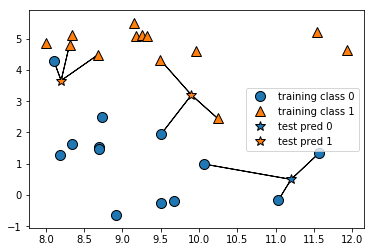

In [18]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [19]:
from sklearn.model_selection import train_test_split
X,y=mglearn.datasets.make_forge()

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [21]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)


In [25]:
#calling the fit classifier
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [29]:
#calling the prediction method
print("test set prediction:\n{}".format(clf.predict(X_test)))

test set prediction:
[1 0 1 0 1 0 0]


In [30]:
print("test accuracy=:{:.2f}".format(clf.score(X_test,y_test)))

test accuracy=:0.86


CREATING DECISION BOUNDRIES BETWEEN THE CLASS FOR N NEIGHBORS

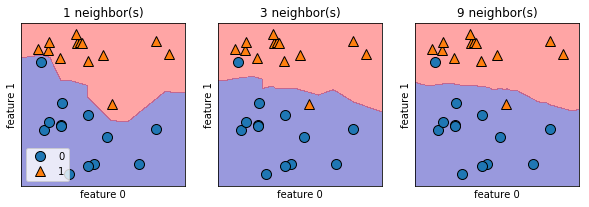

In [33]:
fig,axes = plt.subplots(1,3,figsize=(10,3))
for n_neighbors, ax in zip([1, 3, 9], axes):
 # the fit method returns the object self, so we can instantiate
 # and fit in one line
 clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
 mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
 mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
 ax.set_title("{} neighbor(s)".format(n_neighbors))
 ax.set_xlabel("feature 0")
 ax.set_ylabel("feature 1")
axes[0].legend(loc=3)


# WORKING WITH TRAIN AND TEST ACCURACY WITH BREAST CANCER DATASET

In [34]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()

In [36]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
 cancer.data, cancer.target, stratify=cancer.target, random_state=66)

In [37]:
training_accuracy= []
test_accuracy=[]
#n_neighbors range from 1 to 10
neighbors_setting = range(1,11)

In [38]:
#constructing the model
for n_neighbors in neighbors_setting:
    clf=KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train,y_train)
    #adding accuracy values to training list
    training_accuracy.append(clf.score(X_train,y_train))
    #adding accuracy values of test list
    test_accuracy.append(clf.score(X_test,y_test))
    

In [40]:
print(training_accuracy)
print("and")
print(test_accuracy)

[1.0, 0.9765258215962441, 0.9577464788732394, 0.9553990610328639, 0.9483568075117371, 0.9460093896713615, 0.9436619718309859, 0.9413145539906104, 0.9342723004694836, 0.9389671361502347]
and
[0.9020979020979021, 0.8881118881118881, 0.9230769230769231, 0.9230769230769231, 0.9230769230769231, 0.9370629370629371, 0.9300699300699301, 0.9300699300699301, 0.916083916083916, 0.916083916083916]


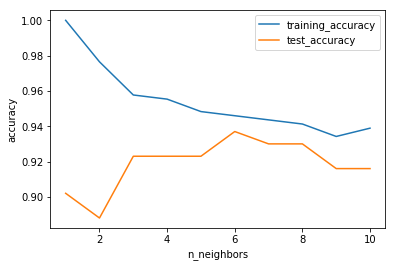

In [41]:
plt.plot(neighbors_setting,training_accuracy,label="training_accuracy")
plt.plot(neighbors_setting,test_accuracy, label="test_accuracy")
plt.ylabel("accuracy")
plt.xlabel("n_neighbors")
plt.legend()

# KNN in Regression

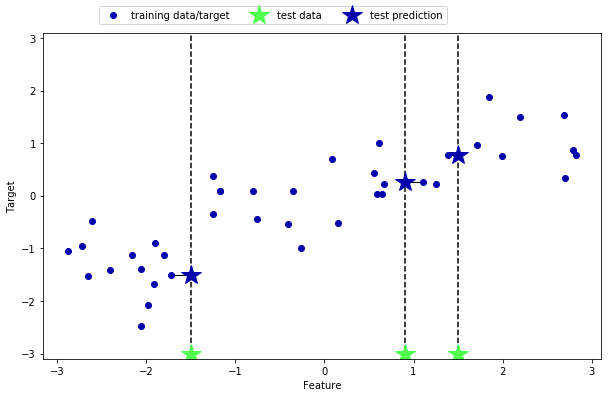

In [42]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

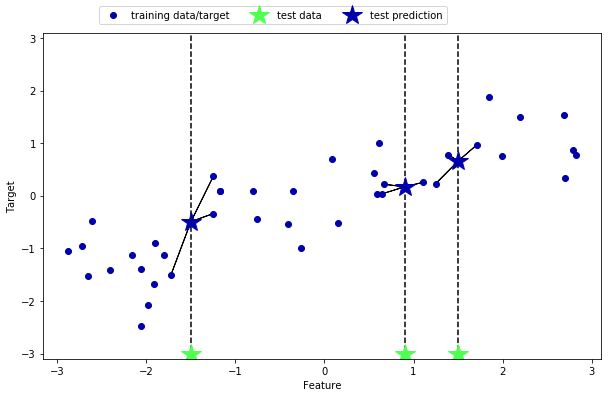

In [43]:
mglearn.plots.plot_knn_regression(n_neighbors=3)


In [45]:
from sklearn.neighbors import KNeighborsRegressor

X,y=mglearn.datasets.make_wave(n_samples=40)

In [46]:
#train test split method
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [47]:
#instantiate the model and set the number of neighbors to 3
reg=KNeighborsRegressor(n_neighbors=3)

In [48]:
#fit method for training data and targets
reg.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=2,
          weights='uniform')

In [49]:
#predict method 
print("test prediction:\n{}".format(reg.predict(X_test)))

test prediction:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [50]:
print("test score:\n{}".format(reg.score(X_test,y_test)))

test score:
0.8344172446249604


ANOTHER EXAMPLE

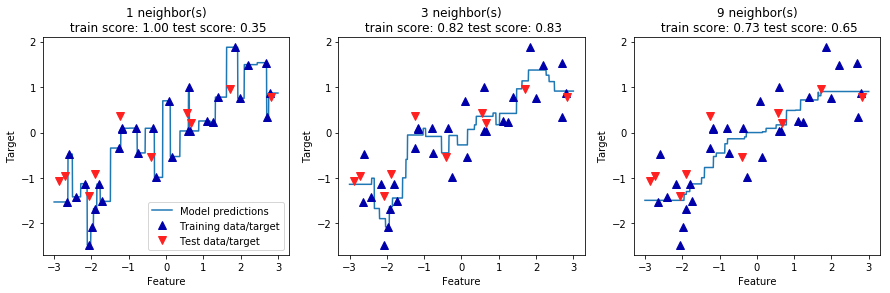

In [51]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
 # make predictions using 1, 3, or 9 neighbors
 reg = KNeighborsRegressor(n_neighbors=n_neighbors)
 reg.fit(X_train, y_train)
 ax.plot(line, reg.predict(line))
 ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
 ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
 ax.set_title(
 "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
 n_neighbors, reg.score(X_train, y_train),
 reg.score(X_test, y_test)))
 ax.set_xlabel("Feature")
 ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
 "Test data/target"], loc="best")